# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


  



---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv
import random
import numpy as np
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
from scipy.misc import imread, imsave, imresize
from skimage import exposure
import warnings

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'
file_names = 'signnames.csv'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of a traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_valid :", X_valid.shape)
print("y_valid :", y_valid.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

##count of each type image
unique, index, counts = np.unique(y_train, return_index = True, return_counts=True)

X_train : (34799, 32, 32, 3)
y_train : (34799,)
X_valid : (4410, 32, 32, 3)
y_valid : (4410,)
X_test  : (12630, 32, 32, 3)
y_test  : (12630,)
Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 



In [3]:
classes_lineup = []
count_per_class = [0]*n_classes
running_counts = [0]*n_classes
class_names = []

for i in range(0, len(y_train)):
    if y_train[i] not in classes_lineup:
        classes_lineup.append(y_train[i])
    count_per_class[y_train[i]]+=1

count_before = 0
for n in classes_lineup:
    running_counts[n] = count_per_class[n] + count_before
    count_before = running_counts[n]
    
with open(file_names) as _f:
    rows = csv.reader(_f, delimiter=',')
    next(rows, None)
    for i, row in enumerate(rows):
        assert(i==int(row[0]))
        class_names.append(row[1]) 
        
print("-----------------------------------------------------------")
print("|%-*s | RUNNING | #   | NAME OF SYMBOL'" % (6, 'COUNT'))
print("-----------------------------------------------------------")

for n in classes_lineup:
    print("|%-*s | %-*s | %-*s | %s " % (6, count_per_class[n], 7, running_counts[n], 3, n, class_names[n]))

-----------------------------------------------------------
|COUNT  | RUNNING | #   | NAME OF SYMBOL'
-----------------------------------------------------------
|210    | 210     | 41  | End of no passing 
|690    | 900     | 31  | Wild animals crossing 
|330    | 1230    | 36  | Go straight or right 
|540    | 1770    | 26  | Traffic signals 
|450    | 2220    | 23  | Slippery road 
|1980   | 4200    | 1   | Speed limit (30km/h) 
|300    | 4500    | 40  | Roundabout mandatory 
|330    | 4830    | 22  | Bumpy road 
|180    | 5010    | 37  | Go straight or left 
|360    | 5370    | 16  | Vehicles over 3.5 metric tons prohibited 
|1260   | 6630    | 3   | Speed limit (60km/h) 
|180    | 6810    | 19  | Dangerous curve to the left 
|1770   | 8580    | 4   | Speed limit (70km/h) 
|1170   | 9750    | 11  | Right-of-way at the next intersection 
|210    | 9960    | 42  | End of no passing by vehicles over 3.5 metric tons 
|180    | 10140   | 0   | Speed limit (20km/h) 
|210    | 10350   | 3

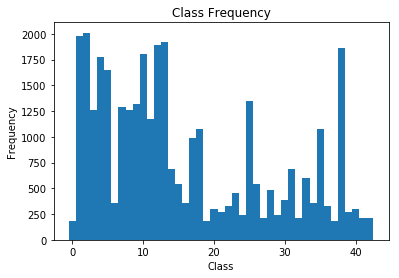

In [4]:
plt.bar(unique, counts, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

(array([  30.,  240.,  240.,  150.,  210.,  210.,   60.,  150.,  150.,
         150.,  210.,  150.,  210.,  240.,   90.,   90.,   60.,  120.,
         120.,   30.,   60.,   60.,   60.,   60.,   30.,  150.,   60.,
          30.,   60.,   30.,   60.,   90.,   30.,   90.,   60.,  120.,
          60.,   30.,  210.,   30.,   60.,   30.,   30.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.13953488,  37.11627907,  38.09302326,
         39.06976

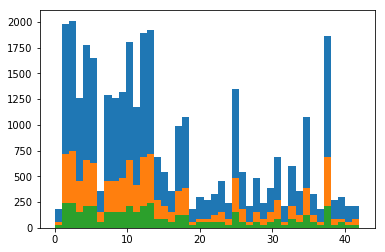

In [5]:
# Making a histogram for the distribution
plt.hist(y_train, bins = n_classes)
plt.hist(y_test, bins = n_classes)
plt.hist(y_valid, bins = n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).


### Pre-process the Data Set (normalization, grayscale, etc.)

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2

# Grayscales an image
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

# Normalizes the data between 0.1 and 0.9 instead of 0 to 255    
def normalize(data):
    return data / 255 * 0.8 + 0.1

# Iterates through grayscale for each image in the data
def preprocess(data):
    gray_images = []
    for image in data:
        gray = grayscale(image)
        gray_images.append(gray)
        
    return np.array(gray_images)

def show_images(X, end, total, images_per_row =30 , images_per_col = 15,
                H = 20, W = 1, its_gray = False):    
    number_of_images = images_per_row * images_per_col
    figure, axis = plt.subplots(images_per_col, images_per_row, figsize=(H, W))
    figure.subplots_adjust(hspace = .2, wspace=.001)
    axis = axis.ravel()
    
    for i in range(number_of_images):
        index = random.randint(end - total, end - 1)
        image = X[index]
        axis[i].axis('off')
        if its_gray:
          axis[i].imshow(image.reshape(32,32), cmap='gray')
        else:
          axis[i].imshow(image)
        
        
def reshape(x): # Add a single grayscale channel
  return x.reshape(x.shape + (1,))

from numpy import newaxis

print('Preprocessing training data...')

# Iterate through grayscale
X_train_preprocessed = preprocess(X_train)
X_train = X_train_preprocessed[..., newaxis]

# Normalize
X_train = normalize(X_train) 

print('Finished preprocessing training data.')

# Double-check that the image is changed to depth of 1
image_shape2 = X_train.shape
print("Processed training data shape =", image_shape2)

print('Preprocessing testing data...')

# Iterate through grayscale
X_test = preprocess(X_test)
X_test = X_test[..., newaxis]

# Normalize
X_test = normalize(X_test) 

print('Finished preprocessing testing data.')

# Double-check that the image is changed to depth of 1
image_shape3 = X_test.shape
print("Processed testing data shape =", image_shape3)

print('All data preprocessing complete.')


Preprocessing training data...
Finished preprocessing training data.
Processed training data shape = (34799, 32, 32, 1)
Preprocessing testing data...
Finished preprocessing testing data.
Processed testing data shape = (12630, 32, 32, 1)
All data preprocessing complete.


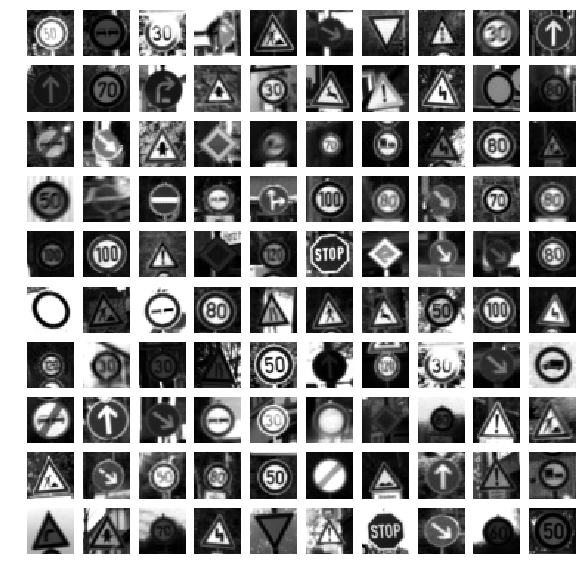

In [7]:
#PLOT 350 RANDOM IMAGES from PREPROCESSED training set
i = np.copy(X_train_preprocessed)

show_images(i, len(i), len(i), images_per_row = 10, images_per_col = 10, 
            H = 10, W = 10, its_gray = True)

In [8]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from scipy import ndimage
import random

# min_desired below is just mean_pics but wanted to make the code below easier to distinguish
pics_in_class = np.bincount(y_train)
mean_pics = int(np.mean(pics_in_class))
min_desired = int(mean_pics)

print('Generating new data.')

# Angles to be used to rotate images in additional data made
angles = [-10, 10, -15, 15, -20, 20]

# Iterate through each class
for i in range(len(pics_in_class)):
    
    # Check if less data than the mean
    if pics_in_class[i] < min_desired:
        
        # Count how many additional pictures we want
        new_wanted = min_desired - pics_in_class[i]
        picture = np.where(y_train == i)
        more_X = []
        more_y = []
        
        # Make the number of additional pictures needed to arrive at the mean
        for num in range(new_wanted):
            
            # Rotate images and append new ones to more_X, append the class to more_y
            more_X.append(ndimage.rotate(X_train[picture][random.randint(0,pics_in_class[i] - 1)], random.choice(angles), reshape=False))
            more_y.append(i)
        
        # Append the pictures generated for each class back to the original data
        X_train = np.append(X_train, np.array(more_X), axis=0)
        y_train = np.append(y_train, np.array(more_y), axis=0)
        
print('Additional data generated. Any classes lacking data now have', min_desired, 'pictures.')

Generating new data.
Additional data generated. Any classes lacking data now have 809 pictures.


The updated number of training examples = 46714


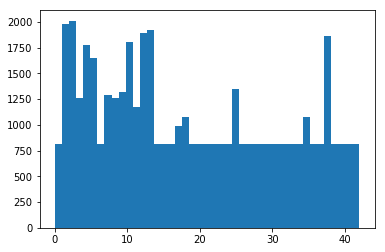

In [9]:
plt.hist(y_train, bins = n_classes)

updated_n_train = len(X_train)
print("The updated number of training examples =", updated_n_train)

In [10]:
# Splitting the training dataset into training and validation data
from sklearn.model_selection import train_test_split

# Shuffle the data prior to splitting
X_train, y_train = shuffle(X_train, y_train)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify = y_train, test_size=0.1, random_state=23)

print('Dataset successfully split for training and validation.')

Dataset successfully split for training and validation.


### Model Architecture

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# The below is only necessary to reset if the notebook has not been shutdown
tf.reset_default_graph()

EPOCHS = 20
BATCH_SIZE = 250

from tensorflow.contrib.layers import flatten

def neural_network(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # Weight and bias
    # If not using grayscale, the third number in shape would be 3
    c1_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 1, 6), mean = mu, stddev = sigma))
    c1_bias = tf.Variable(tf.zeros(6))
    # Apply convolution
    conv_layer1 = tf.nn.conv2d(x, c1_weight, strides=[1, 1, 1, 1], padding='VALID') + c1_bias
    
    # Activation for layer 1
    conv_layer1 = tf.nn.relu(conv_layer1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv_layer1 = tf.nn.avg_pool(conv_layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    # Note: The second layer is implemented the exact same as layer one, with layer 1 as input instead of x
    # And then of course changing the numbers to fit the desired ouput of 10x10x16
    # Weight and bias
    c2_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = sigma))
    c2_bias = tf.Variable(tf.zeros(16))
    # Apply convolution for layer 2
    conv_layer2 = tf.nn.conv2d(conv_layer1, c2_weight, strides=[1, 1, 1, 1], padding='VALID') + c2_bias
    
    # Activation for layer 2
    conv_layer2 = tf.nn.relu(conv_layer2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_layer2 = tf.nn.avg_pool(conv_layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten to get to fully connected layers. Input = 5x5x16. Output = 400.
    flat = tf.contrib.layers.flatten(conv_layer2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    # Although this is fully connected, the weights and biases still are implemented similarly
    # There is no filter this time, so shape only takes input and output
    # Weight and bias
    fc1_weight = tf.Variable(tf.truncated_normal(shape = (400, 200), mean = mu, stddev = sigma))
    fc1_bias = tf.Variable(tf.zeros(200))
    # Here is the main change versus a convolutional layer - matrix multiplication instead of 2D convolution
    fc1 = tf.matmul(flat, fc1_weight) + fc1_bias
    
    # Activation for the first fully connected layer.
    # Same thing as before
    fc1 = tf.nn.relu(fc1)
    
    # Dropout, to prevent overfitting
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    # Same as the fc1 layer, just with updated output numbers
    fc2_weight = tf.Variable(tf.truncated_normal(shape = (200, 100), mean = mu, stddev = sigma))
    fc2_bias = tf.Variable(tf.zeros(100))
    # Again, matrix multiplication
    fc2 = tf.matmul(fc1, fc2_weight) + fc2_bias
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5 Fully Connected. Input = 84. Output = 43.
    # Since this is the final layer, output needs to match up with the number of classes
    fc3_weight = tf.Variable(tf.truncated_normal(shape = (100, 43), mean = mu, stddev = sigma))
    fc3_bias = tf.Variable(tf.zeros(43))
    # Again, matrix multiplication
    logits = tf.matmul(fc2, fc3_weight) + fc3_bias
    
    return logits


In [12]:
# Set placeholder variables for x, y, and the keep_prob for dropout
# Also, one-hot encode y
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [13]:
# Setting learning rate, loss functions, and optimizer
rate = 0.005

logits = neural_network(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [14]:
# The below is used in the validation part of the neural network
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy =  sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

save_file ='train_model.ckpt'
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            loss = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.7})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    # Save the model
    saver.save(sess, save_file)
    print('Trained Model Saved.')

# Launch the model on the test data
with tf.Session() as sess:
    saver.restore(sess, save_file)

    test_accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test, keep_prob : 1.0})

print('Test Accuracy: {}'.format(test_accuracy))

Training...

EPOCH 1 ...
Validation Accuracy = 0.799

EPOCH 2 ...
Validation Accuracy = 0.896

EPOCH 3 ...
Validation Accuracy = 0.942

EPOCH 4 ...
Validation Accuracy = 0.965

EPOCH 5 ...
Validation Accuracy = 0.974

EPOCH 6 ...
Validation Accuracy = 0.971

EPOCH 7 ...
Validation Accuracy = 0.982

EPOCH 8 ...
Validation Accuracy = 0.985

EPOCH 9 ...
Validation Accuracy = 0.984

EPOCH 10 ...
Validation Accuracy = 0.983

EPOCH 11 ...
Validation Accuracy = 0.987

EPOCH 12 ...
Validation Accuracy = 0.990

EPOCH 13 ...
Validation Accuracy = 0.985

EPOCH 14 ...
Validation Accuracy = 0.988

EPOCH 15 ...
Validation Accuracy = 0.985

EPOCH 16 ...
Validation Accuracy = 0.991

EPOCH 17 ...
Validation Accuracy = 0.989

EPOCH 18 ...
Validation Accuracy = 0.988

EPOCH 19 ...
Validation Accuracy = 0.988

EPOCH 20 ...
Validation Accuracy = 0.990

Trained Model Saved.
INFO:tensorflow:Restoring parameters from H:/2_Self_Driving_Cars_ND/P2_Traffic_Sign_Classifier/CarND-Traffic-Sign-Classifier-Project/tr

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(6, 32, 32, 1) (6,)


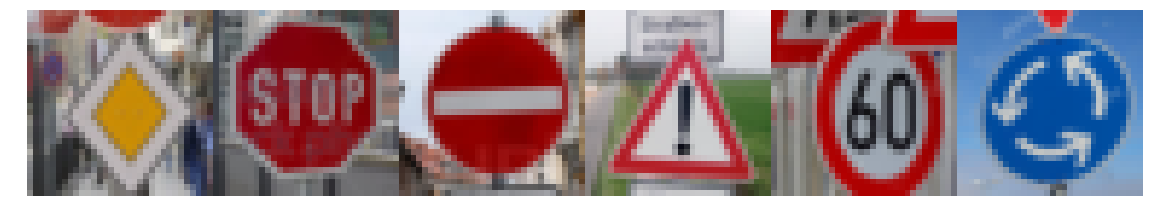

In [16]:
# Load the images from the internet

path = "./test_pics/"
image_name = ['12-priority-road',
              '14-stop','17-no-entry',
              '18-general-caution','3-60speed', 
              '40-roundabout-mandatory']

image_list = []

for name in image_name: 
    img = imread(path + name + '.png')
    img = imresize(img, (32, 32))
    image_list.append(img)

own_set_x = np.array(image_list)
own_set_x = preprocess(own_set_x)
own_set_x = reshape(own_set_x)
own_set_y = np.array([12,14, 17, 18, 3, 40])
print(own_set_x.shape, own_set_y.shape)   

#show selected image from internet 

number_of_images = len(image_list)
figure, axis = plt.subplots(1, number_of_images, figsize=(20, 20))
figure.subplots_adjust(hspace = .2, wspace=.001)
axis = axis.ravel()
    
for i in range(number_of_images):     
    image = image_list[i]
    axis[i].axis('off')
    axis[i].imshow(image)


### Predictions and Softmax Probablities

In [17]:
#Top 5 predictions based on built-in top_k function 

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    OUT = sess.run(tf.argmax(logits, 1), feed_dict={x: own_set_x, y: own_set_y, keep_prob: 1.0})
    print("", OUT, "<-predictions")
    print("", own_set_y, "<-actual")

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    OUT = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 5), feed_dict={x: own_set_x, y: own_set_y, keep_prob: 1.0})
    print(OUT[1].T)
    print("(top  5 predictions above) for each image")
    
print()  

print("Softmax probability for top 5 predictions for each image:")

for i in range(len(own_set_y)):
    print(i, OUT[0][i].T)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(own_set_x, own_set_y )
    print("Test Accuracy = {:.3f}".format(test_accuracy))  

INFO:tensorflow:Restoring parameters from H:/2_Self_Driving_Cars_ND/P2_Traffic_Sign_Classifier/CarND-Traffic-Sign-Classifier-Project/train_model.ckpt
 [12 14 17 18 11 40] <-predictions
 [12 14 17 18  3 40] <-actual
INFO:tensorflow:Restoring parameters from H:/2_Self_Driving_Cars_ND/P2_Traffic_Sign_Classifier/CarND-Traffic-Sign-Classifier-Project/train_model.ckpt
[[12 14 17 18 11 40]
 [ 0  0  0  0  0  0]
 [ 1  1  1  1  1  1]
 [ 2  2  2  2  2  2]
 [ 3  3  3  3  3  3]]
(top  5 predictions above) for each image

Softmax probability for top 5 predictions for each image:
0 [ 1.  0.  0.  0.  0.]
1 [ 1.  0.  0.  0.  0.]
2 [ 1.  0.  0.  0.  0.]
3 [ 1.  0.  0.  0.  0.]
4 [ 1.  0.  0.  0.  0.]
5 [ 1.  0.  0.  0.  0.]
INFO:tensorflow:Restoring parameters from H:/2_Self_Driving_Cars_ND/P2_Traffic_Sign_Classifier/CarND-Traffic-Sign-Classifier-Project/train_model.ckpt
Test Accuracy = 0.833
